In [1]:
#Import Libraries

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import save_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [2]:
# Constants

PROCESSED_DATA_FOLDER = 'processed_data'
AUGMENTED_DATA_FOLDER = 'augmented_data'
IMG_SIZE = (256, 256)  # Size of the images
NUM_AUGMENTATIONS_PER_IMAGE = 3  # Number of augmented versions to create per image
CLASS_TO_DISPLAY = 'Modhealthy'

In [3]:
#Data Augmentation Setup

def setup_data_augmentation():
    """
    Sets up the data augmentation configuration.
    """
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    return datagen

In [4]:
#Function to Augment and Save Images

def augment_and_save_images(datagen, src_folder, dest_folder, num_augmentations, img_size):
    """
    Applies data augmentation to the images and saves them to a new folder.
    """
    for class_folder in os.listdir(src_folder):
        class_path = os.path.join(src_folder, class_folder)
        dest_class_path = os.path.join(dest_folder, class_folder)
        os.makedirs(dest_class_path, exist_ok=True)

        for img_filename in os.listdir(class_path):
            img_path = os.path.join(class_path, img_filename)
            image = load_img(img_path, target_size=img_size)
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0)

            # Generate and save augmented images
            for i in range(num_augmentations):
                augmented_image = next(datagen.flow(image, batch_size=1))
                save_img(os.path.join(dest_class_path, f"aug_{i}_{img_filename}"), augmented_image[0])

In [5]:
#Function to Automatically Select and Display Augmented Images

def auto_select_and_display_augmented_images(datagen, src_folder, class_name, img_size, num_samples=3):
    """
    Automatically selects a number of images from a given class and displays 
    them along with their augmented versions.
    """
    class_path = os.path.join(src_folder, class_name)
    image_files = sorted(os.listdir(class_path))[:num_samples]

    for img_filename in image_files:
        img_path = os.path.join(class_path, img_filename)
        original_image = load_img(img_path, target_size=img_size)
        original_image = img_to_array(original_image)
        original_image = np.expand_dims(original_image, axis=0)

        # Display original image
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 3, 1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(original_image[0]))
        plt.title("Original Image")
        plt.axis("off")

        # Generate and display augmented images
        for i in range(1, NUM_AUGMENTATIONS_PER_IMAGE + 1):
            augmented_image = next(datagen.flow(original_image, batch_size=1))
            plt.subplot(2, 3, i+1)
            plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image[0]))
            plt.title(f"Augmentation {i}")
            plt.axis("off")

        plt.show()

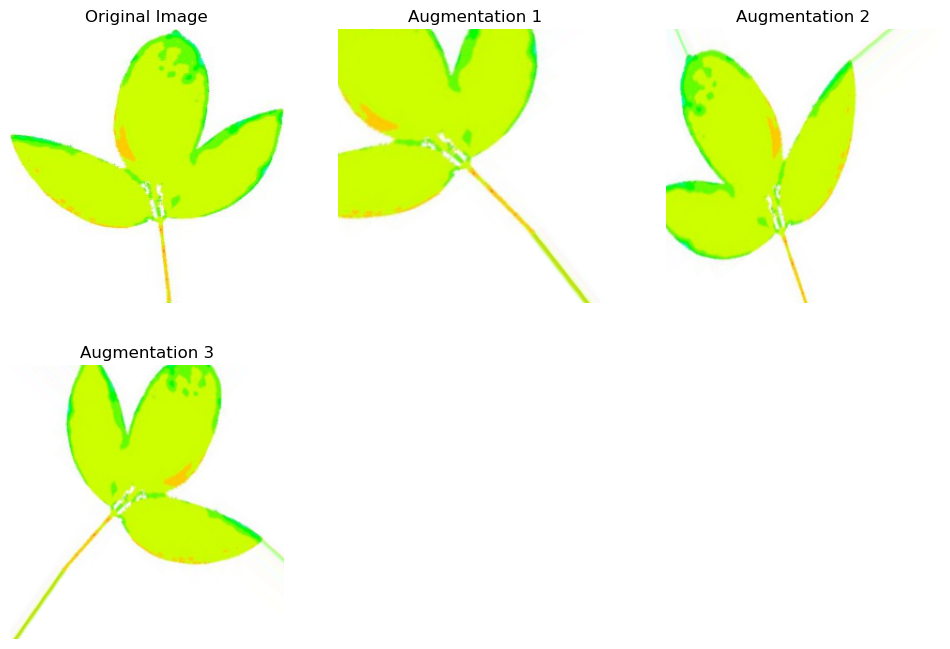

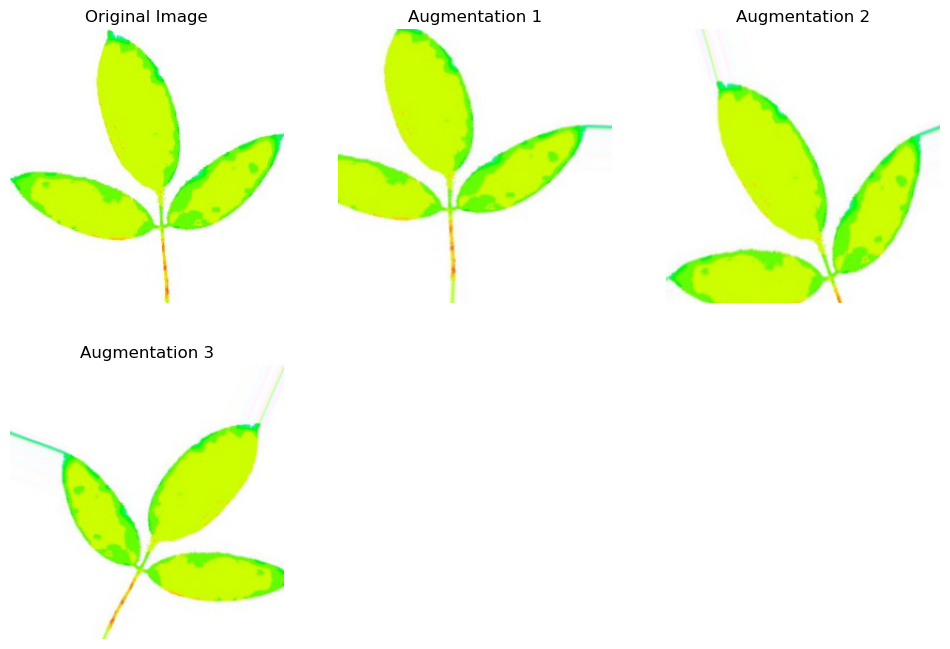

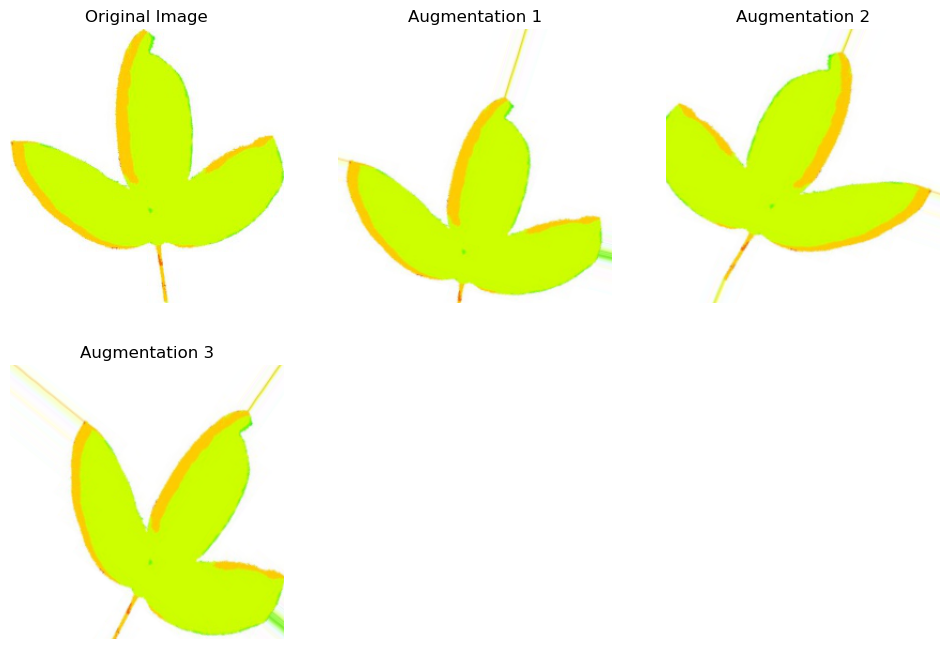

Augmented images saved in augmented_data


In [6]:
#Main Function to Execute Data Augmentation
def main():
    datagen = setup_data_augmentation()
    auto_select_and_display_augmented_images(datagen, PROCESSED_DATA_FOLDER, CLASS_TO_DISPLAY, IMG_SIZE)
    augment_and_save_images(datagen, PROCESSED_DATA_FOLDER, AUGMENTED_DATA_FOLDER, NUM_AUGMENTATIONS_PER_IMAGE, IMG_SIZE)
    print(f"Augmented images saved in {AUGMENTED_DATA_FOLDER}")

if __name__ == "__main__":
    main()